# Data Cleaning

In [2]:
# Importing Librareis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [13]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

data = train.append(test, ignore_index=True, sort=False)

data.isna().sum()

id                0
Area(total)       0
Troom             3
Nbedrooms         4
Nbwashrooms       3
Twashrooms        1
roof           2006
Roof(Area)     2006
Lawn(Area)        3
Nfloors           0
API               2
ANB               0
Grade          3299
EXPECTED          0
dtype: int64

In [14]:
for column in ['Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms']:
    data[column].fillna(data[column].mode()[0], inplace=True)
    
data['Lawn(Area)']=data['Lawn(Area)'].fillna(round(data['Lawn(Area)'].mean()))
data['API']=data['API'].fillna(round(data['API'].mean()))

data.isna().sum()

id                0
Area(total)       0
Troom             0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof           2006
Roof(Area)     2006
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Grade          3299
EXPECTED          0
dtype: int64

In [15]:
data.at[data['roof']=='NO','roof']=0
data.at[data['roof']=='YES','roof']=1
data.at[data['roof']=='yes','roof']=1
data.at[data['roof']=='no','roof']=0

data['EXPECTED'] =data['EXPECTED'].replace({'\$':''}, regex = True)

In [16]:
train = data.iloc[:7000]
test = data.iloc[7000:]

In [17]:
test.drop(['Grade'], axis=1, inplace=True)

In [18]:
train.replace('-', np.nan, inplace = True)
train = train.dropna()

test.replace('-', np.nan, inplace = True)
test = test.dropna()

# Data Visualisation

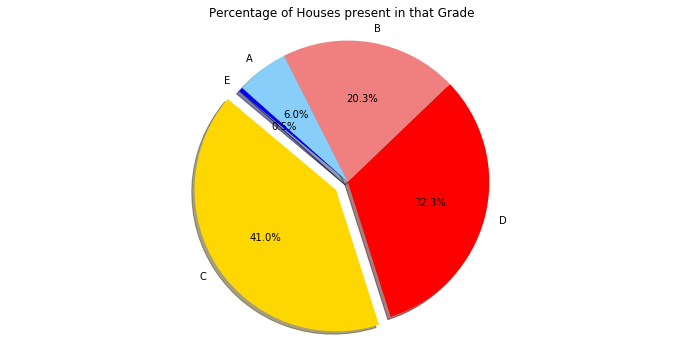

In [19]:
plt.figure(figsize=(12,6))
names = train['Grade'].value_counts()[:10].index
values = train['Grade'].value_counts()[:10].values
colors = ['gold','red','lightcoral','lightskyblue','blue']
explode = (0.1,0,0,0,0)
plt.pie(values,explode=explode,labels=names,colors=colors,autopct='%1.1f%%',shadow =True,startangle=140)
plt.axis('equal')
plt.title('Percentage of Houses present in that Grade')
plt.show()

# Data Spliting

In [20]:
X=train[['Area(total)','Troom', 'Nbedrooms', 'Twashrooms', 'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'EXPECTED']]
y=train['Grade']

X1=test[['Area(total)','Troom', 'Nbedrooms', 'Twashrooms', 'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'EXPECTED']]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# KNN Model

In [22]:
classifier_KNN = KNeighborsClassifier(n_neighbors=70)
classifier_KNN.fit(X_train, y_train)

train_score_knn=classifier_KNN.score(X_train,y_train)
test_score_knn=classifier_KNN.score(X_test,y_test)
print("Test Score {} Train Score {} ".format(test_score_knn,train_score_knn))

Test Score 0.7026548672566372 Train Score 0.663050697365508 


In [23]:
parameters=[{'n_neighbors':[10,20,30,40,50,60,70,80,90]}]

grid_search= GridSearchCV(estimator= classifier_KNN,param_grid=parameters,scoring='accuracy',cv=5,n_jobs= -1)

grid_search=grid_search.fit(X_train, y_train)
best_accuracy_knn=grid_search.best_score_
best_parameters_knn=grid_search.best_params_

In [24]:
best_accuracy_knn

0.6597185879908662

In [25]:
best_parameters_knn

{'n_neighbors': 70}

In [29]:
print(classification_report(y, classifier_KNN.predict(X)))

              precision    recall  f1-score   support

           A       0.76      0.49      0.60       337
           B       0.64      0.50      0.56      1146
           C       0.62      0.80      0.70      2316
           D       0.78      0.66      0.72      1822
           E       0.00      0.00      0.00        26

    accuracy                           0.67      5647
   macro avg       0.56      0.49      0.51      5647
weighted avg       0.68      0.67      0.67      5647



C:\Users\sanket\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest Model

In [30]:
classifier_rf=RandomForestClassifier(criterion='entropy',random_state = 1,n_estimators = 60)
classifier_rf.fit(X_train,y_train)

train_score_rf=classifier_rf.score(X_train,y_train)
test_score_rf=classifier_rf.score(X_test,y_test)
print("Test Score {} Train Score {} ".format(test_score_rf,train_score_rf))

Test Score 0.9088495575221239 Train Score 1.0 


In [24]:
parameters=[{'n_estimators' : [10,20,30,40,50,60,70,80,90], 'criterion' : ['entropy'],'random_state':[0,1,2]},
           {'n_estimators' : [10,20,30,40,50,60,70,80,90], 'criterion' : ['gini'],'random_state':[0,1,2]}]

grid_search= GridSearchCV(estimator= classifier_rf,param_grid=parameters,scoring='accuracy',cv=5,n_jobs= -1)

grid_search=grid_search.fit(X_train,y_train)
best_accuracy_rf=grid_search.best_score_
best_parameters_rf=grid_search.best_params_

In [25]:
best_accuracy_rf

0.8793414772782956

In [26]:
best_parameters_rf

{'criterion': 'entropy', 'n_estimators': 60, 'random_state': 1}

In [31]:
print(classification_report(y, classifier_rf.predict(X)))

              precision    recall  f1-score   support

           A       0.99      0.97      0.98       337
           B       0.98      0.97      0.98      1146
           C       0.98      0.99      0.98      2316
           D       0.99      0.98      0.99      1822
           E       1.00      0.81      0.89        26

    accuracy                           0.98      5647
   macro avg       0.99      0.94      0.96      5647
weighted avg       0.98      0.98      0.98      5647



# SVM Model

In [32]:
classifier_svm = SVC(gamma=0.8)
classifier_svm.fit(X_train,y_train)
    
test_score = classifier_svm.score(X_test,y_test)
train_score = classifier_svm.score(X_train,y_train)
print("Test Score {} Train Score {} ".format(test_score,train_score))

Test Score 0.41858407079646015 Train Score 1.0 


In [33]:
print(classification_report(y, classifier_svm.predict(X)))

              precision    recall  f1-score   support

           A       1.00      0.82      0.90       337
           B       1.00      0.82      0.90      1146
           C       0.78      1.00      0.88      2316
           D       1.00      0.79      0.88      1822
           E       1.00      0.73      0.84        26

    accuracy                           0.88      5647
   macro avg       0.96      0.83      0.88      5647
weighted avg       0.91      0.88      0.88      5647



### Running model on test data and generating predictions with RFC Non Generalized Model as it is giving the better accuracy precision

In [34]:
y_pred = classifier_rf.predict(X1)

In [35]:
test['Grade']=y_pred
test["EXPECTED"]=test["EXPECTED"].astype(str)+"$"
test

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED,Grade
7001,2,311,6.0,5.0,5.0,6.0,0.0,0.0,86.0,6,83.0,4,3432$,D
7002,3,342,5.0,6.0,6.0,7.0,1.0,120.0,85.0,4,95.0,5,4066$,C
7004,5,307,6.0,2.0,3.0,4.0,0.0,0.0,76.0,2,64.0,4,3031$,D
7005,6,297,6.0,6.0,4.0,6.0,1.0,81.0,103.0,6,73.0,6,4223$,C
7006,7,292,9.0,7.0,6.0,7.0,1.0,78.0,101.0,5,88.0,5,4993$,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10293,3294,310,5.0,3.0,3.0,5.0,1.0,97.0,105.0,3,91.0,2,3391$,D
10295,3296,338,7.0,3.0,2.0,4.0,0.0,0.0,87.0,3,75.0,6,3714$,D
10296,3297,307,8.0,4.0,5.0,6.0,1.0,88.0,88.0,4,83.0,6,3824$,C
10297,3298,352,5.0,3.0,4.0,5.0,1.0,88.0,100.0,2,99.0,4,3533$,D
